In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [12]:
fruit_info = pd.DataFrame(
    data = {'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [13]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

,color,fruit
0,red,apple
1,orange,orange
2,yellow,banana
3,pink,raspberry


In [15]:
fruit_info.shape

(4, 2)

In [14]:
fruit_info.values

array([['apple', 'red'],
       ['orange', 'orange'],
       ['banana', 'yellow'],
       ['raspberry', 'pink']], dtype=object)

In [19]:
fruit_info['rank1'] = [2, 3, 4, 1]
fruit_info['rank2'] = [2, 3, 4, 1]

In [20]:
fruit_info

,fruit,color,rank1,rank2
0,apple,red,2,2
1,orange,orange,3,3
2,banana,yellow,4,4
3,raspberry,pink,1,1


In [40]:
fruit_info_original = fruit_info.drop(['rank1', 'rank2'], axis = 1)
fruit_info_original

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [39]:
fruit_info_caps = fruit_info_original.rename(columns={'fruit': 'Fruit', 'color': 'Color'})
fruit_info_caps

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [42]:
import requests
from pathlib import Path

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path to the file.
    """
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        created = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded at", created)
    return file_path

In [43]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Downloading... Done!


In [45]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=column_labels)

states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = states[0]
for state_df in states[1:]:
    baby_names = pd.concat([baby_names, state_df])
baby_names = baby_names.reset_index().iloc[:, 1:]

In [46]:
len(baby_names)

6215834

In [47]:
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [48]:
baby_names.loc[2:5, 'Name']

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [49]:
baby_names.loc[2:5, ['Name']]

,Name
2,Anna
3,Margaret
4,Helen
5,Elsie


In [51]:
sorted_baby_names = baby_names.sort_values(by = ['Name'])
sorted_baby_names.head()

,State,Sex,Year,Name,Count
4242030,NY,M,2014,Aaban,6
4239947,NY,M,2013,Aaban,6
4252325,NY,M,2019,Aadam,6
5555476,TX,M,2008,Aadan,5
752313,CA,M,2009,Aadan,6


In [52]:
sorted_baby_names.iloc[1:4, 3]

4239947    Aaban
4252325    Aadam
5555476    Aadan
Name: Name, dtype: object

In [54]:
sorted_baby_names.loc[1:4, "Name"]

1          Annie
4261214    Annie
5685225    Annie
1188612    Annie
5680424    Annie
           ...  
813950     Helen
5596435    Helen
2815482    Helen
3286321    Helen
4          Helen
Name: Name, Length: 2106190, dtype: object

In [55]:
df = baby_names[:5].set_index("Name")
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


In [56]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


In [59]:
#Example: 
df.iloc[1:4, 2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


In [61]:
name_and_year = baby_names.loc[:, ['Name', 'Year']]
name_and_year.head()

,Name,Year
0,Mary,1910
1,Annie,1910
2,Anna,1910
3,Margaret,1910
4,Helen,1910


In [65]:
ca = baby_names[baby_names['State'] == 'CA']
ca.head()

,State,Sex,Year,Name,Count
390635,CA,F,1910,Mary,295
390636,CA,F,1910,Helen,239
390637,CA,F,1910,Dorothy,220
390638,CA,F,1910,Margaret,163
390639,CA,F,1910,Frances,134


In [66]:
result = baby_names[baby_names['Count'] > 3000]
result.head()

,State,Sex,Year,Name,Count
121874,AL,M,1947,James,3038
411274,CA,F,1944,Linda,3003
412262,CA,F,1945,Linda,3191
412263,CA,F,1945,Mary,3019
413298,CA,F,1946,Linda,3777


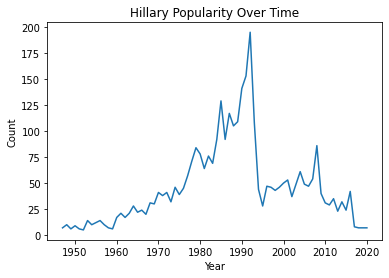

In [68]:
hillary_baby_name = baby_names[(baby_names['Name'] == 'Hillary') & (baby_names['State'] == 'CA') & (baby_names['Sex'] == 'F')]
plt.plot(hillary_baby_name['Year'], hillary_baby_name['Count'])
plt.title("Hillary Popularity Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

The Bill Clinton scandal likely caused this decrease in name popularity

In [69]:
counts_aggregated_by_name_and_year = baby_names.groupby(["Name", "Year"])["Count"].sum().reset_index()

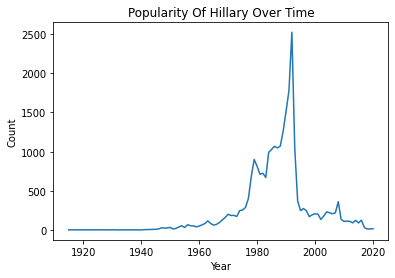

In [77]:
name_of_interest = 'Hillary'
chosen_baby_name = counts_aggregated_by_name_and_year.query("Name == @name_of_interest")
plt.plot(chosen_baby_name['Year'], chosen_baby_name['Count'])
plt.title(f"Popularity Of {name_of_interest} Over Time")
plt.xlabel('Year')
plt.ylabel('Count');